# Introduction to Random Forest

In my last article I talked about `Decision Trees` and I think it's time to talk about a closely related algorithm and my favorite algorithm called `Random Forest`. As always I'm `Md. Rishat Talukder`. Let's get started.

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)

# Introduction

`Random Forest` is more like a method of training a `Decision Tree` rather than a `stand alone` model.

Random Forest is a `ensemble` of `Decision Trees` and it's a `supervised learning` algorithm.

What is a `ensemble`?

## Ensemble

`Ensemble` refers to a `collection` of `models` that are trained together and then `combined` to make a `final prediction`.

Let's say you have a `K Nearest Neighbor` model and you train it on a certain dataset and then you take a bunch of `K Nearest Neighbor` models and train them on different `subsets` of the same dataset. You combine the predictions of all the `K Nearest Neighbor` models and then you make a final prediction.

> There is a slight chance that the predictions of the `K Nearest Neighbor` models trained on different subsets of the dataset will be better than a single `K Nearest Neighbor` model trained on the whole dataset.

This is the main idea of `ensemble` algorithms.

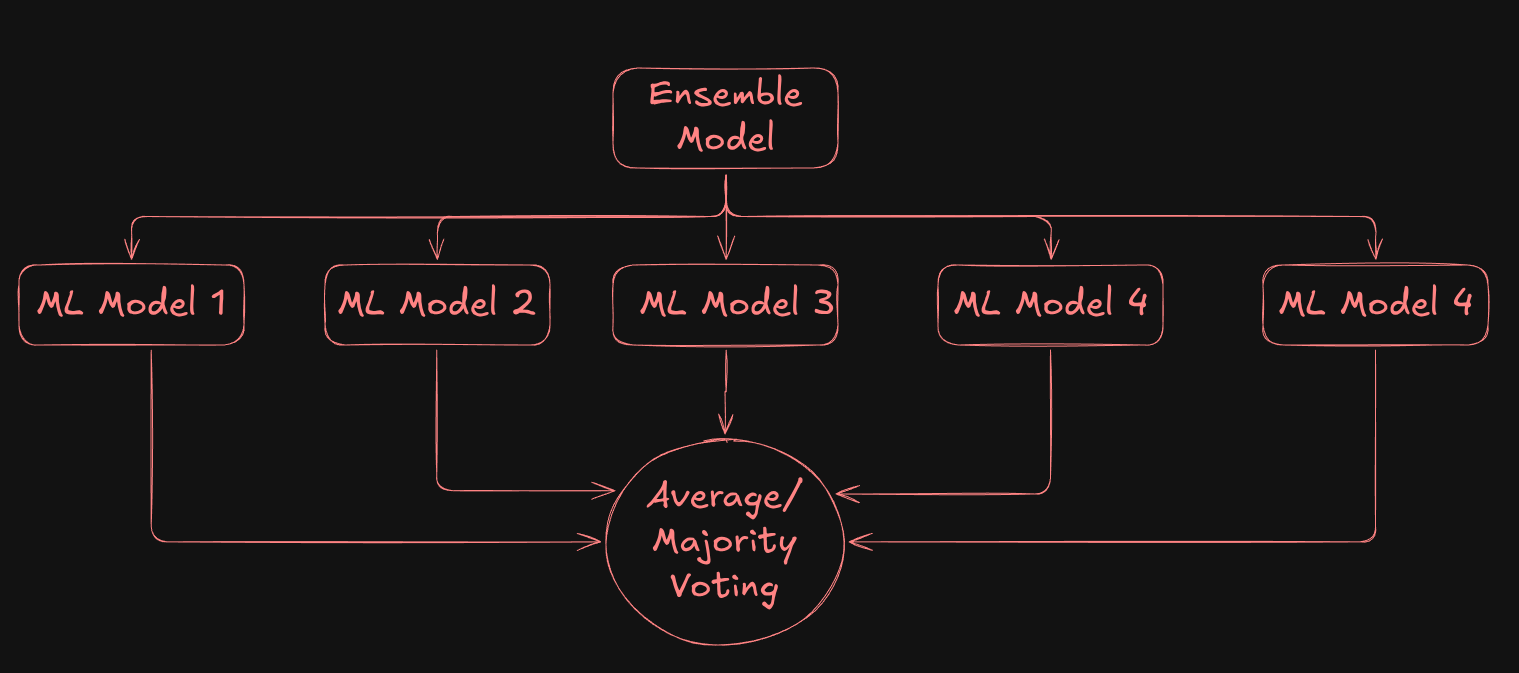

> For classification problems `majority voting` is used to combine the predictions and for regression problems `averaging` is used to combine the predictions.

There are 3 types of ensemble algorithms:

- `Bagging`
- `Boosting`
- `Stacking`


Below are **clear, descriptive, article-ready notes** on **Bagging, Boosting, and Stacking**.
They’re written to flow naturally after decision trees / random forests and to emphasize **intuition first, math second**.

---

# Ensemble Learning Overview

Ensemble methods combine multiple models to produce a single, stronger predictor.
The core idea is simple:

> **A group of imperfect models can outperform a single perfect-looking one.**

The three most important ensemble strategies are **Bagging**, **Boosting**, and **Stacking**.

---

### Bagging (Bootstrap Aggregating)

**`Bagging`** is an ensemble technique where multiple models are trained **independently** on different **bootstrap samples** of the same dataset, and their predictions are **aggregated**.

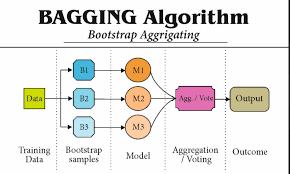

- How it works:

1. Create multiple datasets by **sampling with replacement**
2. Train a separate model on each dataset
3. Combine predictions:

   * Classification → majority vote
   * Regression → average

Each model sees **slightly different data**, which introduces diversity.

This method:

* Reduces **variance**
* Prevents overfitting
* Stabilizes unstable models

Works best with **high-variance models**, such as decision trees.

Models are trained **in parallel**, no dependency between models, same algorithm used for all models, bias remains roughly the same. `Bagged Decision Trees ` and `Random Forest (bagging + feature randomness)` uses this method.

If dataset is small or noisy, If the model overfits easily `bagging` can work like a charm.

> Bagging reduces variance by training many independent models on different views of the same data.

## Boosting

**`Boosting`** is another ensemble method where models are trained **sequentially**, and each new model focuses on correcting the mistakes made by previous ones.

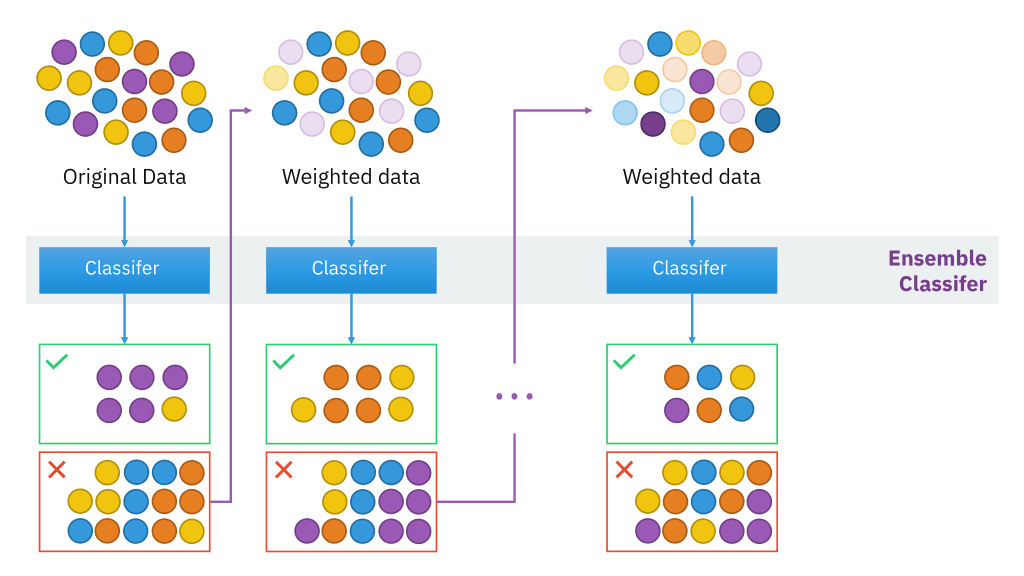

How it works (conceptually):

1. Train a weak model
2. Increase importance of misclassified samples
3. Train the next model on harder cases
4. Repeat
5. Combine all models into a weighted prediction

Each model learns from the **errors of the previous models**.

It's a little more complex then bagging.

### Why Boosting works

This model helps reducing **bias**, converts weak learners into a strong learner, forces the model to focus on difficult patterns. It is especially effective when the model is **underfitting**.


Even though the models are trained **sequentially** each model depends on previous ones and sensitive to noise and outliers and often requires regularization

Some popular `boosting` algorithms are:
* AdaBoost
* Gradient Boosting
* XGBoost
* LightGBM
* CatBoost

When to use Boosting?

* Bias is high
* Dataset is reasonably clean
* Complex patterns exist

> Boosting improves performance by forcing models to learn from their own mistakes.

### Stacking (Stacked Generalization)

**Stacking** is an ensemble technique where **different types of models** are combined, and a **meta-model** learns how to best combine their predictions.

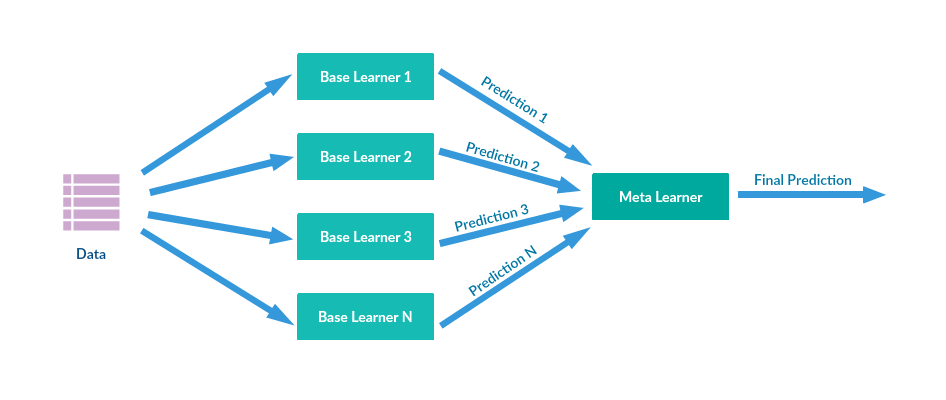

How it works:

1. Train multiple **base models** (e.g., tree, SVM, logistic regression)
2. Generate predictions from these models
3. Use those predictions as features
4. Train a **meta-learner** on top of them


> *Main Idea is which model to trust, and when.*


This method leverages strengths of different model families, captures complementary patterns, more flexible than bagging or boosting because of the meta-learner.

This method is not perfect. The models can be heterogeneous and requires careful cross-validation, more complex and harder to debug. This model has high risk of data leakage if done incorrectly

> Stacking learns how to combine models, instead of assuming all models are equally useful.

### Comparison of Ensemble Methods

| Method   | Main Goal   | Training Style | Reduces  | Risk                 |
| -------- | ----------- | -------------- | -------- | -------------------- |
| Bagging  | Stability   | Parallel       | Variance | Underfitting         |
| Boosting | Accuracy    | Sequential     | Bias     | Overfitting to noise |
| Stacking | Flexibility | Multi-layer    | Both     | Data leakage         |

<br>

> Bagging, boosting, and stacking represent three different philosophies of ensemble learning: reducing variance through independence, reducing bias through correction, and reducing error through intelligent combination. Understanding when and why each approach works is far more important than memorizing their algorithms.


Now let's talk about `Random Forest`.

# Random Forest

`Random Forest` Algorithm is a `ensemble` of `Decision Trees`. Main concept is to train multiple `Decision Trees` on different subsets of the dataset and then combine their predictions to make a final prediction.

Hmmmm?! This sound familiar?

It's the bagging technique applied to `Decision Trees` buuuuut there some catches.

## How it works


- **`Step 1: Start with the original dataset`**

Assume we have:

* A feature matrix `X`
* A target variable `y`

This dataset may contain:

* Noise
* Correlated features
* Limited samples

> A single decision tree trained on this data is likely to **overfit**.

- **`Step 2: Create bootstrap samples (row sampling)`**

For each tree in the forest:

* Randomly sample data points **with replacement**.
* The sample size is usually equal to the original dataset size.
* Some points may appear multiple times.
* Some points may not appear at all.

These unused samples are called **Out-of-Bag (OOB)** samples.

> Almost 37% of the data is left out for each tree.

This introduces variation between trees and at the same time prevents all trees from learning the same noise


- **`Step 3: Train a decision tree on each bootstrap sample`**

Each bootstrap sample is used to train **one decision tree**.

Key property:

* Trees are usually grown **deep and unpruned**
* Each tree has **low bias but high variance**

At this stage, each tree is intentionally allowed to overfit.

- **`Step 4: Random feature selection at each split`**

When a tree tries to split a node:

* It does **not** consider all features.
* It randomly selects a subset of features.

  * Classification: `√(number of features)`
  * Regression: `number of features / 3`

The best split is chosen **only from this subset**.

Purpose:

* Reduces correlation between trees
* Prevents dominant features from controlling every tree
* Encourages diverse decision boundaries

- **`Step 5: Repeat to build many trees`**

Steps 2–4 are repeated:

Let's say you are making 100 or a 1000 decision trees.

Each tree:

* Sees different data
* Uses different features
* Makes different mistakes

- **`Step 6: Aggregate predictions from all trees`**

Once all trees are trained:

- For classification:

* Each tree votes for a class
* The final prediction is the **majority vote**

- For regression:

* Each tree outputs a numeric value
* The final prediction is the **average**

>Even though the tree are intentionally gets overfitted this aggregation smooths out individual tree errors.

- **`Step 7: Evaluate using Out-of-Bag samples (optional)`**

Since each tree leaves out almost 37% of the data:

* These OOB samples can act as a **validation set**.
* Predictions are made only by trees that did not see the sample.

This provides:

* An unbiased estimate of generalization performance
* No need for a separate validation split

## Why Random Forest Works

Random Forest works because it combines:

* **Low-bias models** (deep trees)
* **Randomness** (data + features)
* **Averaging** (variance reduction)

Mathematically:

* Variance decreases as tree correlation decreases.
* Bias remains relatively low.

> A Random Forest does not try to be clever with a single model. Instead, it lets many simple models disagree—and then trusts the consensus.

As always we are going to use `scikit-learn` to build a `Random Forest` model. So, I think I should introduce you guys with some of the `key hyperparameters`.

* `n_estimators` → number of trees
* `max_depth` → controls overfitting
* `min_samples_split` → prevents noisy splits
* `max_features` → controls feature randomness

> Having understood how Random Forest reduces variance through controlled randomness, we can now appreciate why ensemble methods often outperform single models on real-world data.